In [2]:
import plotly.express as px
import panel as pn
pn.extension('plotly')
import locale
locale.setlocale(locale.LC_ALL, 'en_CA.UTF-8')
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
from panel.interact import interact
from panel import widgets
import numpy as np
import pandas as pd
import datetime as dt
from IPython.display import display
import pandas_datareader as pdr
import time
from scipy.optimize import minimize
import plotly.graph_objects as go

In [3]:
def get_age():
    age_dict = {
        10 : "Above 60 years", 
        20 : "Between 50 and 60 years" ,
        30 : "Between 40 and 50 years" ,
        40 : "Between 30 and 40 years" ,
        50 : "Between 20 and 30 years" 
    }
    age_prob = [0.2] * 5
    age_choice = np.random.choice(list(age_dict.values()), size = 1, p = age_prob)
    age_selection = [age for age, value in age_dict.items() if value == age_choice][0]
    return age_selection

In [4]:
def get_inv_horizon():
    inv_horizon_dict = {
        10 : "<= 1 year", 
        20 : "> 1 year and <= 3 years" ,
        30 : "> 3 years and <= 5 years",
        40 : "> 5 years and <= 7 years",
        50 : "> 7 years" 
    }
    inv_horizon_prob = [0.2] * 5
    inv_horizon_choice = np.random.choice(list(inv_horizon_dict.values()), size = 1, p = inv_horizon_prob)
    inv_hzn_selection = [inv_hzn for inv_hzn, value in inv_horizon_dict.items() if value == inv_horizon_choice][0]
    return inv_hzn_selection

In [5]:
def get_goal():
    goal_dict = {
        10 : "Minimize Risk, preservation of capital even if not meeting inflation", 
        20 : "Modest appreciation with atleast meeting inflation" ,
        30 : "Periodic Income" ,
        40 : "Some Growth + Periodic Income" ,
        50 : "High Returns and Investment Growth" 
    }
    goal_prob = [0.2] * 5
    goal_choice = np.random.choice(list(goal_dict.values()), size = 1, p = goal_prob)
    goal_selection = [goal for goal, value in goal_dict.items() if value == goal_choice][0]
    return goal_selection

In [6]:
def get_25percent_decline_response():
    response_dict = {
        10 : "Take out money immediately", 
        20 : "Move money to other investments" ,
        30 : "Concerned but wait a  bit more to see if things improved" ,
        40 : "Expected Risk and market downturn, leave money in place and expect things to improve" ,
        50 : "Can tolerate higher degrees of fluctuation in the value, to invest more expecting future growth" 
    }
    response_prob = [0.2] * 5
    response_choice = np.random.choice(list(response_dict.values()), size = 1, p = response_prob)
    response_selection = [response for response, value in response_dict.items() if value == response_choice][0]
    return response_selection

In [7]:
def get_inv_knowledge():
    knowledge_dict = {
        10 : "First time investor. No familiarity or interest", 
        20 : "Little familiarity" ,
        30 : "Understand the importance of diversification" ,
        40 : "Understand market fluctuation, different market sectors and growth characteristics requirements",
        50 : "Experienced with all investment classes" 
    }
    knowledge_prob = [0.2] * 5
    knowledge_choice = np.random.choice(list(knowledge_dict.values()), size = 1, p = knowledge_prob)
    knowledge_selection = [knowledge for knowledge, value in knowledge_dict.items() if value == knowledge_choice][0]
    return knowledge_selection

In [8]:
def get_exp_return():
    exp_return_dict = {
        10 : "Inflation + <=1%"      , 
        20 : "Inflation + >1% & <=3%",
        30 : "Inflation + >3% & <=6%",
        40 : "Inflation + >6% & <=9%",
        50 : "Inflation + >9%" 
    }
    exp_return_prob = [0.2] * 5
    exp_return_choice = np.random.choice(list(exp_return_dict.values()), size = 1, p = exp_return_prob)
    exp_return_selection = [ret for ret, value in exp_return_dict.items() if value == exp_return_choice][0]
    return exp_return_selection

In [9]:
def get_portfolio_type(total):
    if  total >= 260: return "Very Aggressive"
    elif  260 > total >= 210: return "Aggressive"
    elif  210 > total >= 150: return "Moderate & Balanced"
    elif  150 > total >= 80: return "Conservative"
    elif  80 > total: return "Very Conservative"

In [10]:
age = 30 # get_age()
hzn = 30 # get_inv_horizon()
goal = 30 # get_goal()
decl_resp = 30 # get_25percent_decline_response()
expr = 30 # get_inv_knowledge()
eret = 30 # get_exp_return()

total = age + hzn + goal + decl_resp + expr + eret
risk_score_quantile = round(total / 300,3)

port_type = get_portfolio_type(total)

allo_dict = {
    "Very Aggressive": {"Stocks" : "90%", "Bonds" : "10%", "Cash": "0%"},
    "Aggressive": {"Stocks" : "70%", "Bonds" : "25%", "Cash": "5%"},
    "Moderate & Balanced": {"Stocks" : "50%", "Bonds" : "40%", "Cash": "10%"},
    "Conservative": {"Stocks" : "35%", "Bonds" : "50%", "Cash": "15%"},
    "Very Conservative": {"Stocks" : "20%", "Bonds" : "60%", "Cash": "20%"}
}

In [11]:
# ETF tickers for the main assest classes
# local_equities = ['^GSPC','^IXIC','^W5000','^DJI','^GSPTSE']
# foreign_equities = ['^FCHI','^GDAXI','^IBEX','^N225','^HSI']
# local_debt = ['VBMFX','FBNDX','LQD','PHB']
# intl_debt = ['PCY','BWX','EMB','AGG']
# cash_equivalents = ['BIL','GSY']
# alternatives_commodities = ['XOP','VNQ','HVPE.L','RWO','XGD.TO']
# tickers = local_equities + foreign_equities + local_debt + intl_debt + cash_equivalents + alternatives_commodities
tickers = ['QQQ','VOO','VTI','GDX','IWM','BND','XLE','IVV','AGG','VTV','TLT','IBB','GLD','SPY','VGK','VWO','IJH','QID','SHY','SQQQ','VEA','EFA','IWF','IJR']

In [12]:
start_date = (dt.date.today() - dt.timedelta(10*365)).isoformat()
end_date = dt.date.today().isoformat()
close_prices_rawdata = pd.DataFrame(columns=tickers)
for ticker in tickers:
    close_prices_rawdata[ticker] = pdr.DataReader(ticker,'yahoo',start_date,end_date)['Adj Close']
close_prices_rawdata.fillna(method='bfill',inplace=True)

In [13]:
split_row = int(close_prices_rawdata.shape[0] * 0.8)
test_data = close_prices_rawdata.iloc[split_row:]

close_prices_rawdata = close_prices_rawdata.iloc[0:split_row]

In [14]:
# Initial Weights
num_assets = len(tickers)
init_weights = num_assets * [1 / num_assets]

returns = close_prices_rawdata.pct_change().dropna()
log_returns = np.log(close_prices_rawdata/close_prices_rawdata.shift(1)).dropna()

bounds = tuple((0,1) for i in range(len(close_prices_rawdata.columns)))
init_weights = [1/(len(close_prices_rawdata.columns))] * (len(close_prices_rawdata.columns))

In [15]:
mkt = pdr.DataReader('^GSPC','yahoo',start_date,end_date)['Adj Close']
mkt_data = mkt.iloc[split_row:]
mkt_returns = mkt_data.fillna(method='bfill').pct_change().dropna()

In [16]:
def calculate_return(weights):
    weights = np.array(weights)
    return np.sum(log_returns.mean() * weights) * 252
    # return np.dot(returns.mean(), weights) * 252
    # return np.sum(returns.mean() * weights) * 252

In [17]:
def calculate_sharpe(weights):
    weights = np.array(weights)
    return calculate_return(weights) / calculate_std_dev(weights)

In [18]:
def negative_sharpe(weights):
    weights = np.array(weights)
    return calculate_sharpe(weights) * -1
    #return -calculate_sharpe(w)

In [19]:
def maximize_return(weights):
    weights = np.array(weights)
    return calculate_return(weights) * -1
    # return np.dot(returns.mean(), weights) * 252
    # return np.sum(returns.mean() * weights) * 252

In [20]:
def minimize_volatility(weights):
    weights = np.array(weights)
    return np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights)))
    # return np.sqrt(np.dot(weights, np.dot(returns.cov(), weights)) * 252)

In [21]:
def calculate_std_dev(weights):
    weights = np.array(weights)
    return np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)) * 252)

In [22]:
def check_sum(weights):
    weights = np.array(weights)
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [23]:
def print_weights(weights):
    w = [round(i*100,2)for i in weights]
    w = pd.DataFrame(w, columns = ['Weight (%)'], index = returns.columns)
    print("\n",w[w['Weight (%)']>0])
    new_w = w[w['Weight (%)']>0]
    return new_w

In [24]:
def negative_return(w):
    return -calculate_return(w)

In [25]:
# Calculate estimated return for each stock
individual_returns = returns.mean() * 252
#display(individual_returns)
# Estimate individual stock risks for comparison
individual_risks = np.std(returns) * np.sqrt(252)
#display(individual_risks)
individual_analysis = pd.concat([individual_returns,individual_risks],axis=1)
individual_analysis.columns = ['Returns','Risks']
individual_analysis['Sharpe_Ratios'] = individual_analysis.Returns / individual_analysis.Risks

sorted_securities = individual_analysis.sort_values(by='Returns', ascending = False)

In [26]:
# Get minimum and maximum risk possible given the asset universe
cons_min_risk = {'type':'eq','fun': check_sum}
min_risk = round(minimize(fun=minimize_volatility, x0=init_weights, bounds=bounds,constraints=cons_min_risk)['fun'],3)
# max_risk = mr = round(minimize(fun=min_max_volatility, x0=init_weights, bounds=bounds,constraints=cons_min_risk)['fun'],3) * -1
max_risk = round(individual_risks.max(),3)
all_risks = np.linspace(min_risk,max_risk).round(3)

In [27]:
start = time.time()

max_returns = []
weights_min_vol_max_ret = []
for each_risk_num in all_risks: 
    cons_returns = ({'type':'eq', 'fun': lambda w: w.sum() - 1},
                    {'type':'eq', 'fun': lambda w: minimize_volatility(w) - each_risk_num})   
    ret_given_risk_results = minimize(maximize_return, x0=init_weights, bounds = bounds, constraints = cons_returns)
    max_returns.append(calculate_return(ret_given_risk_results['x']))
    weights_min_vol_max_ret.append(ret_given_risk_results['x'])
    
max_return_volatility = minimize_volatility(weights_min_vol_max_ret[np.argmax(max_returns)])
frontier_return = np.linspace(0,max_return_volatility,100)

frontier_volatility = []
weights_array = []
returns_array = []

for possible_return in frontier_return:
    cons_risk = ({'type':'eq', 'fun':check_sum},
                 {'type':'eq', 'fun': lambda w: calculate_return(w) - possible_return})
    
    results = minimize(minimize_volatility,init_weights,method='SLSQP', bounds=bounds, constraints=cons_risk)
    frontier_volatility.append(results['fun'])
    weights_array.append(results['x'])
    returns_array.append(calculate_return(results['x']))

ef_df = pd.DataFrame({'Returns':returns_array, 'Volatility':frontier_volatility})
ef_df['Sharpe'] = ef_df['Returns'] /  ef_df['Volatility']
ef_df_pos_sharpe = ef_df[ef_df['Sharpe']>= 1]
opt_sharpe = ef_df_pos_sharpe[ef_df_pos_sharpe.Sharpe == ef_df_pos_sharpe.Sharpe.max()]
print('Elapsed Time: %.2f seconds' % (time.time() - start))

Elapsed Time: 111.77 seconds


In [28]:
goal_risk = np.percentile(ef_df_pos_sharpe.Volatility,q=(risk_score_quantile*100))
goal_cons = ({'type':'eq', 'fun': lambda w: w.sum() - 1},
             {'type':'eq', 'fun': lambda w: calculate_std_dev(w) - goal_risk})

opt_goal = minimize(negative_return, x0=init_weights, bounds = bounds, constraints=goal_cons)
opt_goal_weights = opt_goal['x']

print("Computational Optimized weights for our risk goal:")
goal_allo = print_weights(opt_goal_weights)
print("\n")
print("Indicators of Optimal Portfolio given our risk goal:")
print("Return {:.3f}, Volatility {:.3f}, Sharpe {:.3f}".format(calculate_return(opt_goal_weights), calculate_std_dev(opt_goal_weights),calculate_sharpe(opt_goal_weights)))

Computational Optimized weights for our risk goal:

      Weight (%)
QQQ       22.12
BND       16.29
AGG       12.82
VTV       17.14
TLT       30.25
IBB        1.39


Indicators of Optimal Portfolio given our risk goal:
Return 0.078, Volatility 0.062, Sharpe 1.269


In [29]:
# Set constrains and initial guess for optimal Sharpe
cons_opt_sharpe = {'type': 'eq', 'fun': lambda w: w.sum() - 1}

opt_results = minimize(negative_sharpe, x0=init_weights, bounds = bounds, constraints=cons_opt_sharpe)
opt_w = opt_results['x']

print("Computational Optimized weights:")
print_weights(opt_w)
print("\n")
print("Indicators of Optimal Portfolio:")
print("Return {:.3f}, Volatility {:.3f}, Sharpe {:.3f}".format(calculate_return(opt_w), calculate_std_dev(opt_w),calculate_sharpe(opt_w)))

Computational Optimized weights:

      Weight (%)
QQQ        3.89
BND       17.23
AGG        5.81
VTV        3.14
IBB        0.28
SHY       69.64


Indicators of Optimal Portfolio:
Return 0.020, Volatility 0.014, Sharpe 1.455


In [30]:
# Set constrains and initial guess for minimum variance
cons_opt_var = {'type':'eq','fun': lambda w: np.sum(w) - 1}
opt_var_results = minimize(fun=calculate_std_dev,bounds=bounds,x0=init_weights,constraints=cons_opt_var)
opt_var_w = opt_var_results['x']
print("Computational Optimized weights:")
print_weights(opt_var_w)
print("\n")
print("Indicators of Minimum Variance Portfolio:")
print("Return {:.3f}, Volatility {:.3f}, Sharpe {:.3f}".format(calculate_return(opt_var_w), calculate_std_dev(opt_var_w),calculate_sharpe(opt_var_w)))

Computational Optimized weights:

       Weight (%)
QQQ        51.91
VOO         0.06
VTV         0.01
IBB         0.08
QID        14.55
SHY        24.31
SQQQ        7.99
IWF         1.00
IJR         0.08


Indicators of Minimum Variance Portfolio:
Return -0.026, Volatility 0.004, Sharpe -6.861


In [31]:
start = time.time()

#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
# cov_matrix = returns.cov() * 252
cov_matrix = returns.cov()

#set number of runs of random portfolio weights
num_portfolios = num_assets * 20000

#set up array to hold results
results = np.zeros((num_portfolios,3+num_assets))
portfolio_returns_records = [] # Define an empty array for portfolio returns
portfolio_volatility_records = [] # Define an empty array for portfolio volatility
portfolio_weights_records = [] # Define an empty array for asset weights
portfolio_sharpe_ratio_records = []# Define an empty list for sharpe ratios

for i in range(num_portfolios):
    #select random weights for portfolio holdings
    # weights = np.random.dirichlet(np.ones(num_assets),size=1)
    mc_weights = np.array(np.random.random(num_assets))
    #rebalance weights to sum to 1
    mc_weights /= np.sum(mc_weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * mc_weights) * 252
    #port_ret = np.sum(log_ret.mean() * wts)
    #port_ret = (port_ret + 1) ** 252 - 1
    portfolio_std_dev = np.sqrt(np.dot(np.transpose(mc_weights),np.dot(cov_matrix, mc_weights))) * np.sqrt(252)
    
    #store results in results array
    results[i,0] = portfolio_return
    results[i,1] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[i,2] = results[i,0] / results[i,1]
    #iterate through the weight vector and add data to results array
    for j in range(len(mc_weights)):
        results[i,j+3] = mc_weights[j]
    portfolio_returns_records.append(portfolio_return)
    portfolio_volatility_records.append(portfolio_std_dev)
    portfolio_weights_records.append(mc_weights)
    portfolio_sharpe_ratio_records.append(results[i,2])

#convert results array to Pandas DataFrame
portfolio_returns_records = np.array(portfolio_returns_records) 
portfolio_volatility_records = np.array(portfolio_volatility_records)
portfolio_weights_records = np.array(portfolio_weights_records)
portfolio_sharpe_ratio_records = np.array(portfolio_sharpe_ratio_records)
stocks_weights = [f'{stock} weight' for stock in returns.columns.tolist()]
# for counter, symbol in enumerate(closes.columns.tolist()):
#     [symbol+' weight'] = [w[counter] for w in p_weights]
column_order = ['Returns', 'Volatility', 'Sharpe_Ratios'] + [stock+' Weight' for stock in tickers]    
results_frame = pd.DataFrame(results,columns=column_order)
print('Elapsed Time: %.2f seconds' % (time.time() - start))

# #locate position of portfolio with highest Sharpe Ratio
# max_sharpe_port = results_frame.iloc[results_frame['Sharpe_Ratios'].idxmax()]
# #max_sharpe_port = results_frame.iloc[results_frame['Sharpe_Ratios'].argmax()]
# print ('Max Sharpe Ratio Portfolio')
# print('*'*30)
# print(max_sharpe_port)
# print('*'*30)
# print ('Min Volatility Portfolio')
# print('*'*30)
# #locate positon of portfolio with minimum standard deviation
# min_vol_port = results_frame.iloc[results_frame['Volatility'].idxmin()]
# #max_sharpe_port = results_frame.iloc[results_frame['Sharpe_Ratios'].argmax()]
# print(min_vol_port)

Elapsed Time: 125.95 seconds


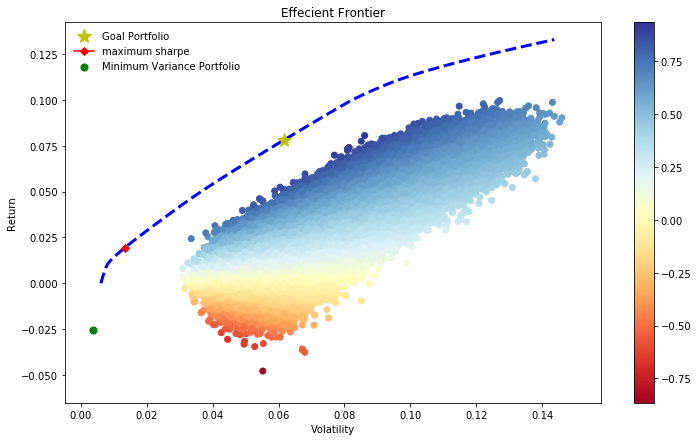

In [32]:
plot_boundary = results_frame.Volatility.max()
plt.figure(figsize=(12,7))
plt.title('Effecient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(results_frame[results_frame.Volatility <= plot_boundary].Volatility,results_frame[results_frame.Volatility <= plot_boundary].Returns,c=results_frame.Sharpe_Ratios,cmap='RdYlBu')
plt.colorbar()
#plt.plot(frontier_volatility,frontier_return, 'b--', linewidth=3)
plt.plot(ef_df[ef_df.Volatility <= plot_boundary].Volatility,ef_df[ef_df.Volatility <= plot_boundary].Returns, 'b--', linewidth=3)
plt.plot(calculate_std_dev(opt_goal_weights),calculate_return(opt_goal_weights), 'y*', markersize = 15.0, label='Goal Portfolio')
plt.plot(opt_sharpe.Volatility,opt_sharpe.Returns, c='red', marker='D', markersize = 5.0, label='maximum sharpe')
plt.scatter(calculate_std_dev(opt_var_w),calculate_return(opt_var_w), c='green', s=50, label='Minimum Variance Portfolio')
plt.legend(frameon=False)
plt.show()


In [40]:
mkt_cum_rets = (1 + mkt_returns).cumprod()
goal_portfolio_returns = test_data.pct_change().dropna().dot(opt_goal_weights)
cummulative_returns = (1 + goal_portfolio_returns).cumprod()

# plt.figure(figsize=(12,7))
# (cummulative_returns*100000).plot(c='darkorange', linewidth=3)
# (mkt_cum_rets*100000).plot(c='red', linewidth=3)
# plt.title("Backtesting with market returns for Investor time Horizon")
# plt.show()

plt1 = (cummulative_returns*100000).hvplot(c='darkorange', line_width=3,label='Portfolio') 
plt2 = (mkt_cum_rets*100000).hvplot(c='red', line_width=3,label='Market')
combplt = (plt1 * plt2).opts(legend_position='top_left',title = 'Backtesting Portfolio value of $100k investment',yformatter='%.00f')
combplt #.opts(legend_position='top_left',title = 'Backtesting Portfolio value of $100k investment')

#.opts(legend_position='top_left',title = 'Backtesting Portfolio value of $100k investment')

:Overlay
   .Curve.Portfolio :Curve   [Date]   (0)
   .Curve.Market    :Curve   [Date]   (Adj Close)

In [33]:
print (f'Market Risk: {round(mkt_returns.std() * np.sqrt(252),3)}')
print (f'Goal Portfolio Risk: {round(goal_portfolio_returns.std() * np.sqrt(252),3)}')

Market Risk: 0.258
Goal Portfolio Risk: 0.101


In [34]:
annualized_mkt_return = mkt_returns.mean() * 252
annualized_mkt_risk = np.std(mkt_returns) * np.sqrt(252)

annualized_portfolio_return = goal_portfolio_returns.mean() * 252
annualized_portfolio_risk = np.std(goal_portfolio_returns) * np.sqrt(252)

annualized_mkt_sharpe = annualized_mkt_return / annualized_mkt_risk
annualized_portfolio_sharpe = annualized_portfolio_return / annualized_portfolio_risk

display (f'S&P 500: {annualized_mkt_sharpe}')
display (f'Goal Portfolio Sharpe: {annualized_portfolio_sharpe}')


'S&P 500: 0.8810653234616839'

'Goal Portfolio Sharpe: 1.7698848540005034'

In [35]:
port_type = get_portfolio_type(total)
print (f'Based on your risk score, your recommended portfolio type was {port_type} and recommended allocations as:\n{allo_dict[port_type]}')

Based on your risk score, your recommended portfolio type was Moderate & Balanced and recommended allocations as:
{'Stocks': '50%', 'Bonds': '40%', 'Cash': '10%'}


In [36]:
goal_allo = print_weights(opt_goal_weights)


      Weight (%)
QQQ       20.99
BND       16.51
AGG       13.54
VTV       17.86
TLT       29.65
IBB        1.45


In [37]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
simulation_results = pd.DataFrame()
runs = 500
forecasted_days = 3*252
avg = goal_portfolio_returns.mean()
std_dev = goal_portfolio_returns.std()
for iteration in range(runs):
    daily_returns = pd.Series(np.random.normal(avg,std_dev,forecasted_days))
    cum_rets = (1 + daily_returns).cumprod()
    simulation_results[iteration+1] = cum_rets
MC_results = pd.Series(simulation_results.tail(1).values.flatten())

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ini_inv = 100000
tbl = np.percentile(MC_results,[0.025,0.975])
ci_lower = round(tbl[0]*ini_inv,2)
ci_upper = round(tbl[1]*ini_inv,2)

# Print results
print(f'There is a 95% chance that an initial investment of {locale.currency(ini_inv,grouping=True)} in the portfolio'
      f' over the next {forecasted_days/252} years will end within in the range of'
      f' {locale.currency(ci_lower,grouping=True)} and {locale.currency(ci_upper,grouping=True)}')

There is a 95% chance that an initial investment of $100,000.00 in the portfolio over the next 3.0 years will end within in the range of $92,558.24 and $112,434.83
